# t1

In [4]:
from sklearn.model_selection import train_test_split
import glob
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import os


# Define a function to load and preprocess images
def load_and_preprocess_images(image_paths, target_size=(224, 224)):
    images = []
    for image_path in image_paths:
        img = image.load_img(image_path, target_size=target_size)
        img = image.img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
    return np.array(images)

# Load your image file paths as before
safe_site_images = glob.glob(r'C:\Users\Manav Patel\sem5\phishing a\safe\*.png')
unsafe_site_images = glob.glob(r'C:\Users\Manav Patel\sem5\phishing a\unsafe\*.png')

# Load and preprocess your image data
safe_site_data = load_and_preprocess_images(safe_site_images)
unsafe_site_data = load_and_preprocess_images(unsafe_site_images)

# Create labels
safe_labels = np.zeros(len(safe_site_data))  # Label 0 for safe sites
unsafe_labels = np.ones(len(unsafe_site_data))  # Label 1 for unsafe sites

# Combine data and labels
X = np.concatenate((safe_site_data, unsafe_site_data), axis=0)
y = np.concatenate((safe_labels, unsafe_labels), axis=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from keras.applications import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [8]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [9]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\Manav Patel\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
epochs = 10  # You can adjust this based on your needs
batch_size = 32  # You can adjust this as well

model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test)
)


Epoch 1/10
20/20 [==============================] - 370s 18s/step - loss: 1.1623 - accuracy: 0.8161 - val_loss: 0.2109 - val_accuracy: 0.9167
Epoch 2/10
20/20 [==============================] - 359s 18s/step - loss: 0.1417 - accuracy: 0.9629 - val_loss: 0.1757 - val_accuracy: 0.9551
Epoch 3/10
20/20 [==============================] - 364s 18s/step - loss: 0.0711 - accuracy: 0.9790 - val_loss: 0.1183 - val_accuracy: 0.9679
Epoch 4/10
20/20 [==============================] - 367s 18s/step - loss: 0.0244 - accuracy: 0.9903 - val_loss: 0.1076 - val_accuracy: 0.9615
Epoch 5/10
20/20 [==============================] - 368s 18s/step - loss: 0.0163 - accuracy: 0.9952 - val_loss: 0.1465 - val_accuracy: 0.9679
Epoch 6/10
20/20 [==============================] - 406s 20s/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.1929 - val_accuracy: 0.9679
Epoch 7/10
20/20 [==============================] - 375s 19s/step - loss: 0.0113 - accuracy: 0.9984 - val_loss: 0.0973 - val_accuracy: 0.9808
Epoch 

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


5/5 [==============================] - 21s 4s/step - loss: 0.1054 - accuracy: 0.9679
Test loss: 0.1054
Test accuracy: 96.79%


In [12]:
model.save('phishing_detection_model.h5')


1/1 [==============================] - 0s 179ms/step


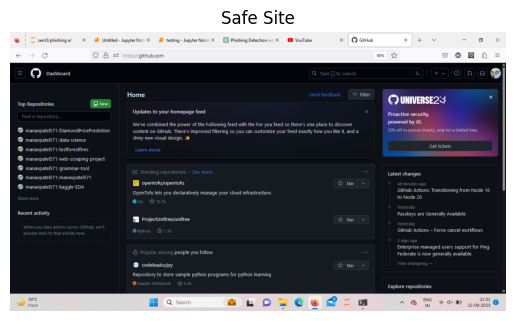

In [22]:
from keras.applications.vgg16 import preprocess_input
from PIL import Image
import numpy as np

# Load and preprocess the example image
example_image_path = r'C:\Users\Manav Patel\Pictures\Screenshots\Screenshot (294).png'  # Replace with the actual path to your image
img = Image.open(example_image_path)
img = img.convert('RGB')  # Convert to RGB mode
img = img.resize((224, 224))  # Resize the image to match the VGG16 input size
img = np.array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)

# Now, you can make predictions with the model
prediction = model.predict(img)

# The 'prediction' variable contains the model's output, which indicates whether the site is phishing or not.

import matplotlib.pyplot as plt

plt.imshow(Image.open(example_image_path))
plt.axis('off')

if prediction > 0.5:
    plt.title("Unsafe Site")
else:
    plt.title("Safe Site")

plt.show()
